In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn import metrics

%matplotlib inline

In [3]:
fl = pd.read_csv('./data/Locations.txt', sep=' ')
fm = pd.read_csv('./data/Oregon_Met_Data.txt', sep=' ')
predictor = KernelDensity()
X1 = fl.as_matrix()
X2 = fm.as_matrix()

In [7]:
predictor.fit(X)
predictor.score_samples

dtype('float64')

In [14]:
X = np.array([1,2,3,4])
Y = np.array([1,1,2,2])
np.bincount(Y, weights=X)

array([ 0.,  3.,  7.])

In [30]:
meanY = np.bincount(fm.SID.as_matrix(), weights=fm.Tmin_deg_C.as_matrix())/np.bincount(fm.SID.as_matrix())
meanY = meanY[1:]
np.set_printoptions(suppress=True,precision=3)
meanY

array([  480.955,     2.75 ,     1.024,   252.083,     0.302,   990.797,
         698.867,    12.232,   108.986,  4178.72 ,   398.099,     3.993,
           5.098,   505.581,     5.312,    11.206,   337.088,    27.784,
          11.379,    81.851,    11.841,     5.461,  2083.946,    16.593,
        1003.046,     5.317,     6.77 ,   463.668,     6.641,    26.811,
          10.769,     6.405,    17.284,     2.965,    34.866,  2105.984,
         965.907,   288.837,   185.806,    81.211,  1201.14 ,  1281.949,
           9.351,    68.399,    29.571,     7.812,  1964.323,   202.679,
        1049.109,     6.036,  2502.788,   314.696,    23.226,   258.369,
          33.489,   175.397,    21.237,    12.293,     2.895,    -0.207,
          -2.161,     6.047,    24.824,     1.192,    34.162,    31.039,
          50.33 ,    45.699,    34.748,    -2.288,   141.283,   155.619,
          83.509,     4.712,   532.42 ,    -0.409,    64.144,     1.894,
          21.713,     7.665,    21.324,    19.842, 

In [31]:
np.bincount(fm.SID.as_matrix())

array([   0,  607, 1827, 1827, 1519, 1827, 1725, 1551, 1827, 1647,  819,
       1723, 1827, 1819, 1698, 1796, 1827, 1776, 1827, 1827, 1827, 1827,
       1827, 1505, 1827, 1490, 1827, 1827, 1724, 1827, 1827, 1827, 1827,
       1827, 1827, 1827, 1337, 1759, 1819, 1676, 1827, 1156, 1756, 1827,
       1827, 1827, 1827, 1090, 1186, 1772, 1827, 1326, 1419, 1827, 1817,
       1827, 1674, 1827, 1796, 1827, 1827, 1820, 1763, 1169, 1825, 1826,
       1780, 1721, 1763, 1775, 1688, 1682, 1736, 1046, 1826, 1156, 1826,
       1826, 1826, 1749, 1810, 1711, 1819,  634, 1825, 1825, 1764, 1757,
       1823, 1746, 1711, 1825, 1813, 1767, 1709, 1157,  236, 1824,  748,
       1824, 1797, 1053, 1823, 1825, 1735, 1735, 1735, 1733, 1735, 1735,
       1735, 1096,  346])

In [6]:

def mean_temperature(sid, fm=fm):
    sp.stats.gaussian_kde()
    predictor = np.linspace(1, fm.Time.max())
    

,SID,Time,Month,Year,Julian,Tmin_deg_C,Tmax_deg_C,Precip_mm
0,9,1,1,2000,1,-18.667,-4.778,0.000
1,9,2,1,2000,2,-20.333,-9.778,1.016
2,9,3,1,2000,3,-17.000,-10.889,0.000
3,9,4,1,2000,4,-14.222,-7.556,9999.000
4,9,5,1,2000,5,-20.889,-6.444,0.000
5,9,6,1,2000,6,-22.000,-7.556,0.000
6,9,7,1,2000,7,-18.667,-8.667,0.000
7,9,8,1,2000,8,-16.444,-5.333,0.000
8,9,9,1,2000,9,-13.111,-5.333,0.000
9,9,10,1,2000,10,-15.889,-5.889,1.524


In [24]:
def G(x, b, kernel, h):
    y = np.sum(x*x,1).reshape(x.shape[0],-1)-2*x.dot(b.T)+np.sum(b*b,1).reshape(-1,b.shape[0])
    return kernel(np.sqrt(y)/h)

def Gaussian(x):
    return np.exp(-(x*x)/2)/np.sqrt(2*pi)

In [11]:
x = np.array([[1,2,3],[1,2,3]]).reshape(3,-1)
y = np.array([[4,5,6],[4,5,6]]).reshape(-1,3)
x+y

array([[5, 6, 7],
       [6, 7, 8],
       [7, 8, 9]])

In [27]:
G(np.array([[1,2],[1,2],[1,2]]), np.array([[4,5],[4,5]]), lambda x: x, 1)

array([[ 4.24264069,  4.24264069],
       [ 4.24264069,  4.24264069],
       [ 4.24264069,  4.24264069]])

In [17]:
np.array([[1,2,3],[1,2,3]]).shape

(2, 3)

In [82]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import LinearRegression

class GaussianDensity():
    def __init__(self, h=1, kernel=rbf_kernel):
        self.h = 1
        self.kernel = kernel
        self.model = LinearRegression()
        self.coeff = None
        self.X = None
        
    def fit(self, X, y):
        if len(X.shape) == 1:
            X = X.reshape(X.size, 1)
        self.X = X
        G = self.kernel(X, X, gamma=self.h)
        self.model.fit(G, y)
        return self
    
    def predict(self, X):
        if len(X.shape) == 1:
            X = X.reshape(X.size, 1)
        G = self.kernel(X, self.X, gamma=self.h)
        return self.model.predict(G)

In [65]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
g = GaussianDensity(h=1)

In [41]:
X = diabetes['data'][:,3]
Y = diabetes['target']

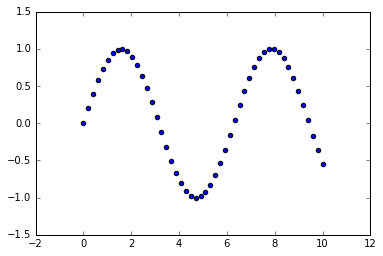

In [69]:
X = np.linspace(0, 10)
Y = np.sin(X)
plt.scatter(X, Y)
X = X.reshape(X.size, 1)

In [103]:
def mean_temperature(sid, fm=fm):
    possible = np.logical_and(fm.SID.as_matrix() == sid, fm.Tmin_deg_C.as_matrix() < 999)
    X = fm.Time.as_matrix()[possible]
    Y = fm.Tmin_deg_C.as_matrix()[possible]
    years = np.arange(1, fm.Time.max()+1)
    return np.mean(GaussianDensity().fit(X, Y).predict(years))

In [123]:
sid = 3
possible = np.logical_and(fm.SID.as_matrix() == sid, fm.Tmin_deg_C.as_matrix() < 999)
X = fm.Time.as_matrix()[possible]
Y = fm.Tmin_deg_C.as_matrix()[possible]
years = np.arange(1, fm.Time.max()+1)
z = GaussianDensity(h=100).fit(X, Y).predict(years)

(1827, 1827)


In [104]:
mean_temperature(1)

(578, 578)


3.46927804176131

In [121]:
z[z<-100]=0

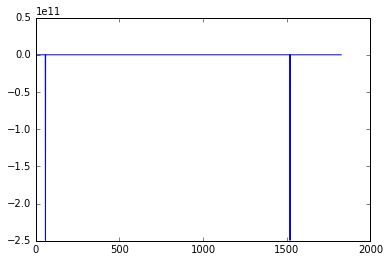

In [124]:
plt.plot(z)